In [ ]:
!pip install mlxtend

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data_clean (1).csv')

In [ ]:
df.head(5)

,Date,Time,Item,Transaction
0,10/17/2021,17:29:00,playstation5,1
1,10/17/2021,17:43:00,เครื่องทำขนมปัง,3
2,10/17/2021,17:43:00,Ergonomic Wrist Rest,2
3,10/17/2021,17:43:00,เครื่องอบผ้า,6
4,10/17/2021,17:43:00,เครื่องชงกาแฟแคปซูล,16


In [ ]:
missing = df.isnull().sum()
print(missing)

Date           0
Time           0
Item           0
Transaction    0
dtype: int64


In [ ]:
df.Item.unique()

array(['playstation5', 'เครื่องทำขนมปัง', 'Ergonomic Wrist Rest',
       'เครื่องอบผ้า', 'เครื่องชงกาแฟแคปซูล', 'เก้าอี้ LA-Z-Boy',
       'เครื่องให้อาหารสัตว์อัตโนมัติ', 'บัตตาเลี่ยน', 'แก้วเก็บความเย็น',
       'ลู่วิ่งออกกำลังกาย', 'Kindle', 'เครื่องซักผ้า',
       'Bluetooth Speaker', 'ห้องน้ำแมวอัตโนมัติ', 'PS5', 'ทรายแมว',
       'ลำโพง pixel', 'Logitech Mx Master 3 Mouse', 'ตุ๊กตา ty',
       'น้ำพุแมว', 'Robot ดูดฝุ่น', 'Mechanical keyboard',
       'Nintendo switch', 'หนังสือ python', 'gaming chair', 'Deskmat',
       'Dew - ไฟโรเซ่', 'เทียนหอม jo malone', 'กระติกน้ำ 2 ลิตร',
       'ที่นอน memory form', 'พลาสเตอร์บรรเทาปวด ตราเสือ',
       'การ์ดจอ RTX 3080', 'ขนมจีนน้ำยาปู', 'Salmon Sashimi',
       'จักรยานเสือหมอบ', 'ไฟแต่งห้องมินิมอล', 'External Harddisk',
       'หม้อทอดไร้น้ํามัน', 'airpods ', 'ยาดม', 'ไฟส่องหน้าไลฟ์สด'],
      dtype=object)

In [ ]:
df.loc[df["Item"]=='NONE'].shape[0]

df = df[df["Item"] != 'NONE']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s

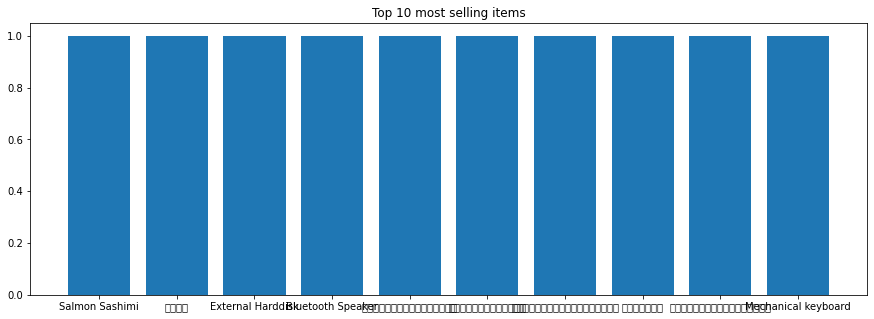

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_for_top10_Items=df['Item'].value_counts().head(10)
Item_array= np.arange(len(df_for_top10_Items))

plt.figure(figsize=(15,5))
Items_name=['Salmon Sashimi','ยาดม','External Harddisk','Bluetooth Speaker','แก้วเก็บความเย็น','ขนมจีนน้ำยาปู','พลาสเตอร์บรรเทาปวด'
,'ตราเสือ','หม้อทอดไร้น้ํามัน','Mechanical keyboard','หนังสือ python']
plt.bar(Item_array,df_for_top10_Items.iloc[:])
plt.xticks(Item_array,Items_name)
plt.title('Top 10 most selling items')
plt.show()


In [ ]:
hot_encoded_df=df.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [ ]:
hot_encoded_df.head(5)

Item,Bluetooth Speaker,Deskmat,Dew - ไฟโรเซ่,Ergonomic Wrist Rest,External Harddisk,Kindle,Logitech Mx Master 3 Mouse,Mechanical keyboard,Nintendo switch,PS5,Robot ดูดฝุ่น,Salmon Sashimi,airpods,gaming chair,playstation5,กระติกน้ำ 2 ลิตร,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,จักรยานเสือหมอบ,ตุ๊กตา ty,ทรายแมว,ที่นอน memory form,น้ำพุแมว,บัตตาเลี่ยน,พลาสเตอร์บรรเทาปวด ตราเสือ,ยาดม,ลำโพง pixel,ลู่วิ่งออกกำลังกาย,หนังสือ python,หม้อทอดไร้น้ํามัน,ห้องน้ำแมวอัตโนมัติ,เก้าอี้ LA-Z-Boy,เครื่องชงกาแฟแคปซูล,เครื่องซักผ้า,เครื่องทำขนมปัง,เครื่องอบผ้า,เครื่องให้อาหารสัตว์อัตโนมัติ,เทียนหอม jo malone,แก้วเก็บความเย็น,ไฟส่องหน้าไลฟ์สด,ไฟแต่งห้องมินิมอล
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ergonomic Wrist Rest),(Dew - ไฟโรเซ่),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
1,(Dew - ไฟโรเซ่),(Ergonomic Wrist Rest),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
2,(Dew - ไฟโรเซ่),(เก้าอี้ LA-Z-Boy),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
3,(เก้าอี้ LA-Z-Boy),(Dew - ไฟโรเซ่),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
4,(Ergonomic Wrist Rest),(เก้าอี้ LA-Z-Boy),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
5,(เก้าอี้ LA-Z-Boy),(Ergonomic Wrist Rest),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
6,(Kindle),(ทรายแมว),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
7,(ทรายแมว),(Kindle),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
8,(Kindle),(น้ำพุแมว),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
9,(น้ำพุแมว),(Kindle),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf


In [ ]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ergonomic Wrist Rest),(Dew - ไฟโรเซ่),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
1,(Dew - ไฟโรเซ่),(Ergonomic Wrist Rest),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
2,(Dew - ไฟโรเซ่),(เก้าอี้ LA-Z-Boy),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
3,(เก้าอี้ LA-Z-Boy),(Dew - ไฟโรเซ่),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
4,(Ergonomic Wrist Rest),(เก้าอี้ LA-Z-Boy),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
...,...,...,...,...,...,...,...,...,...
2177,(เครื่องให้อาหารสัตว์อัตโนมัติ),"(ทรายแมว, ลำโพง pixel, น้ำพุแมว, ลู่วิ่งออกกำล...",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
2178,(น้ำพุแมว),"(ทรายแมว, ลำโพง pixel, เครื่องให้อาหารสัตว์อัต...",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
2179,(ลู่วิ่งออกกำลังกาย),"(ทรายแมว, ลำโพง pixel, เครื่องให้อาหารสัตว์อัต...",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
2180,(Kindle),"(ทรายแมว, ลำโพง pixel, เครื่องให้อาหารสัตว์อัต...",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [ ]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [ ]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [ ]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3650 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3595 missing from current font.
  font.set_text(s

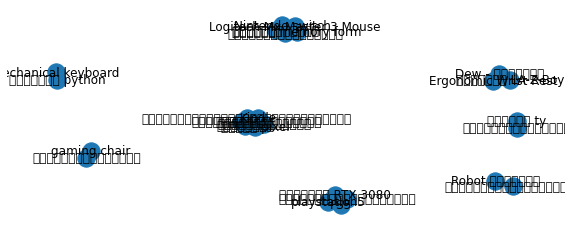

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()